# Машинное обучение, первое домашнее задание


## 0. Описание задачи


#### 
Для выполнения текущего домашнего задания используется датасет с характеристиками различных песен разных музыкальных жанров. Целью исследования является предсказания жанра песни по ее характеристикам и выясление основных факторов, отвечающих за принадлежность песни к тому или иному жанру. 

## 1. Чтение данных

In [1]:
import pandas as pd 
import numpy as np                                       
import seaborn as sns           
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline              

In [2]:
data = pd.read_csv("music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Данные в датафрейме

**instance_id** - идентификатор песни   
**artist_name** - имя исполнителя  
**track_name** - название песни  
**popularity** - популярность песни  
**acousticness** - акустичность песни  
**danceability** - танцевальность песни (вообще странное конечно слово на русском, как мне кажется, но вообще это пригодность песни для танцев под нее)  
**the duration of the music in ms** - длительность песни  
**energy** - драйвовость песни  
**instrumentalness** - инструментальность песни (да, звучит странно.)  
**music key** - тональность песни  
**liveness** - живость песни  
**loudness** - громкость песни  
**mode** - лад песни (мажорный или минорный) 
**speechiness** - количество речи в песне  
**tempo** - темп песни  
**obtained_date** - дата  
**valence** - чувственность песни  


## 2. Визуализация данных


In [4]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


Из таблички видно, что у нас есть записи, у которых длительность равна -1 миллисекунде, что наверное неправильно, ведь длительность песни не может быть отрицательной


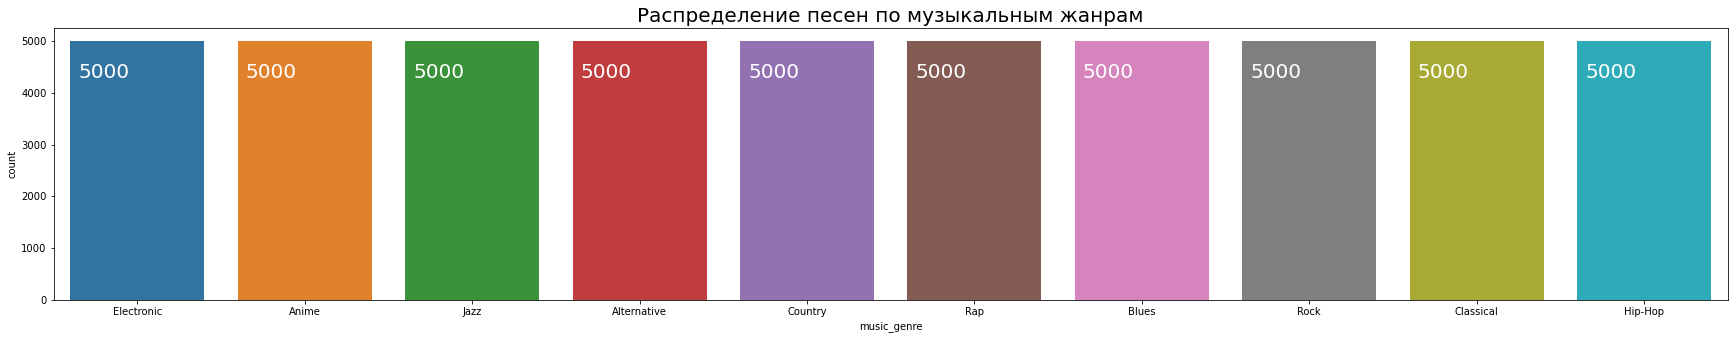

In [5]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="music_genre", data=data)
ax.set_title('Распределение песен по музыкальным жанрам', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
plt.show()

#### 
Идеальный баланс классов


<AxesSubplot:>

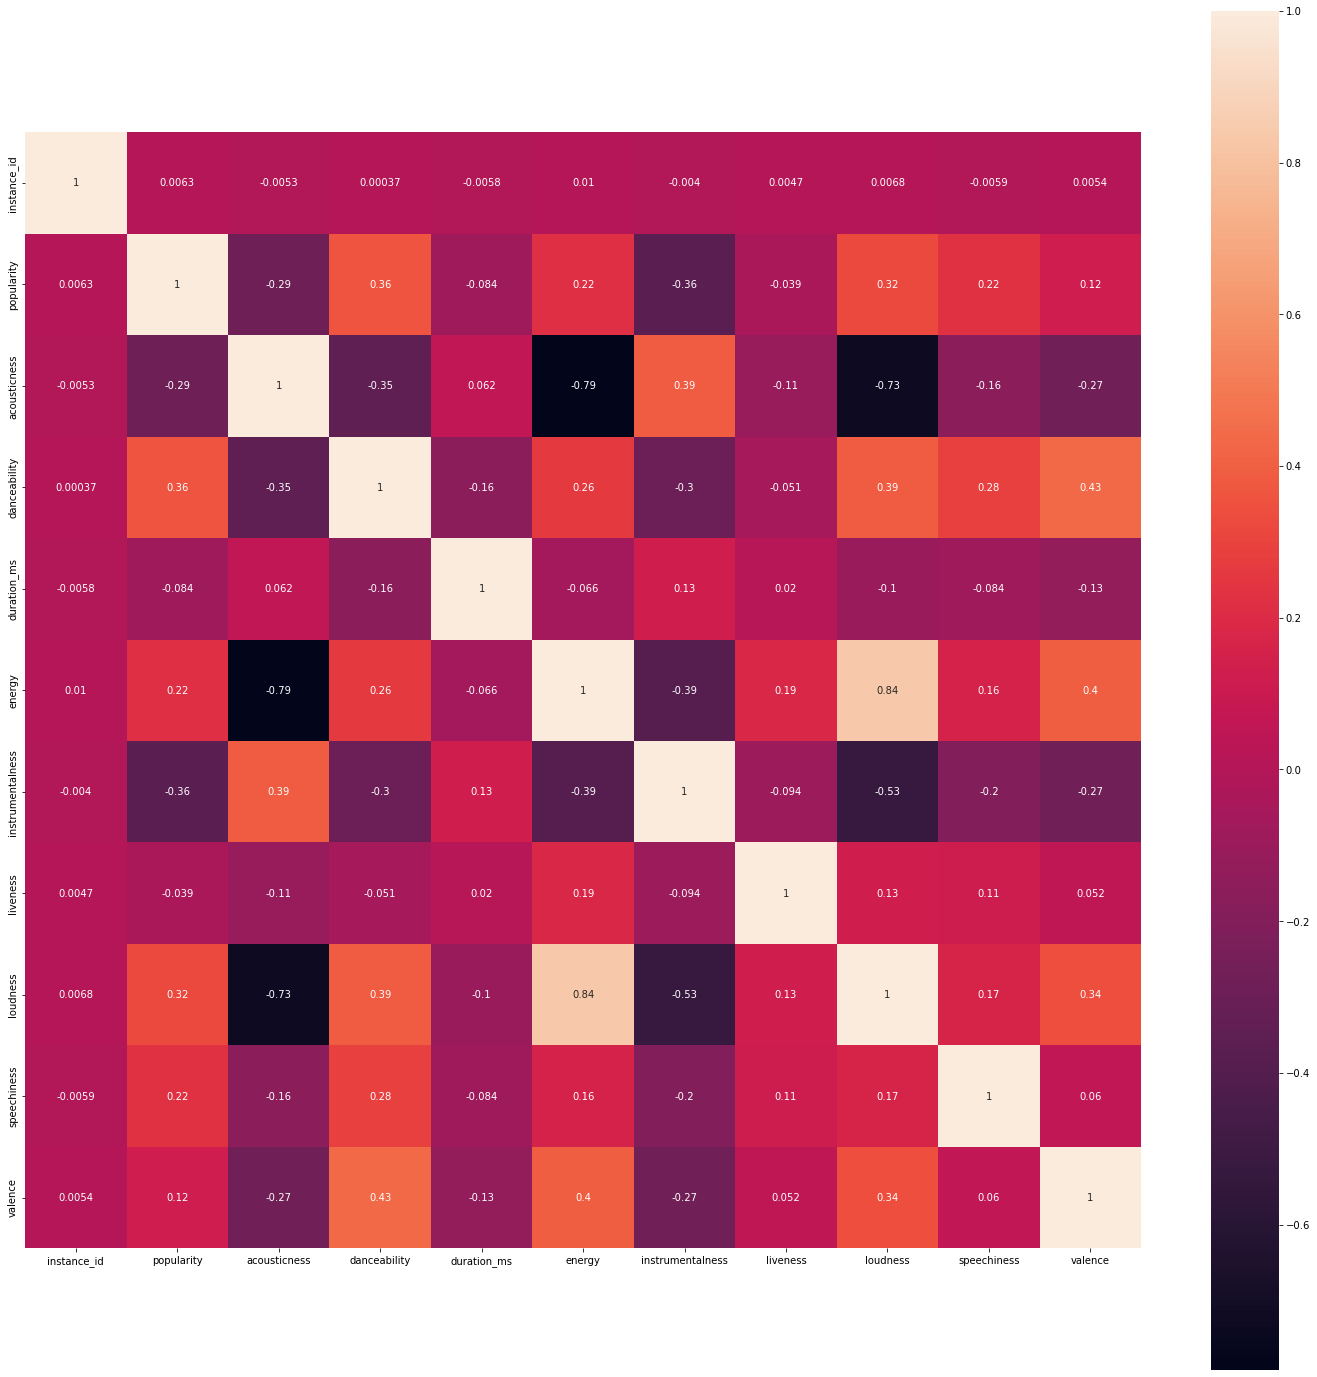

In [6]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,square=True)

<AxesSubplot:xlabel='music_genre', ylabel='popularity'>

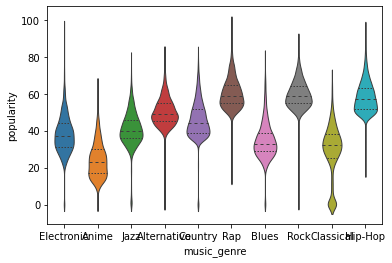

In [7]:
sns.violinplot(data=data, x="music_genre", y="popularity", split=True, inner="quart", linewidth=1)

#### 
Классическая музыка, аниме музка и блюз нынче отстают конечно от других жанров по популярности :c 

<AxesSubplot:xlabel='mode', ylabel='count'>

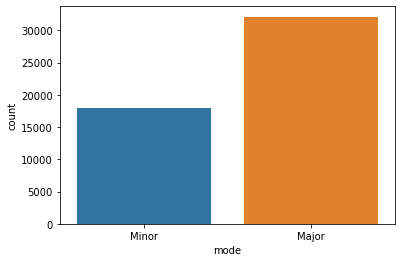

In [8]:
sns.countplot(x="mode", data=data)

#### 
А минорный строй отстает от мажорного :c 

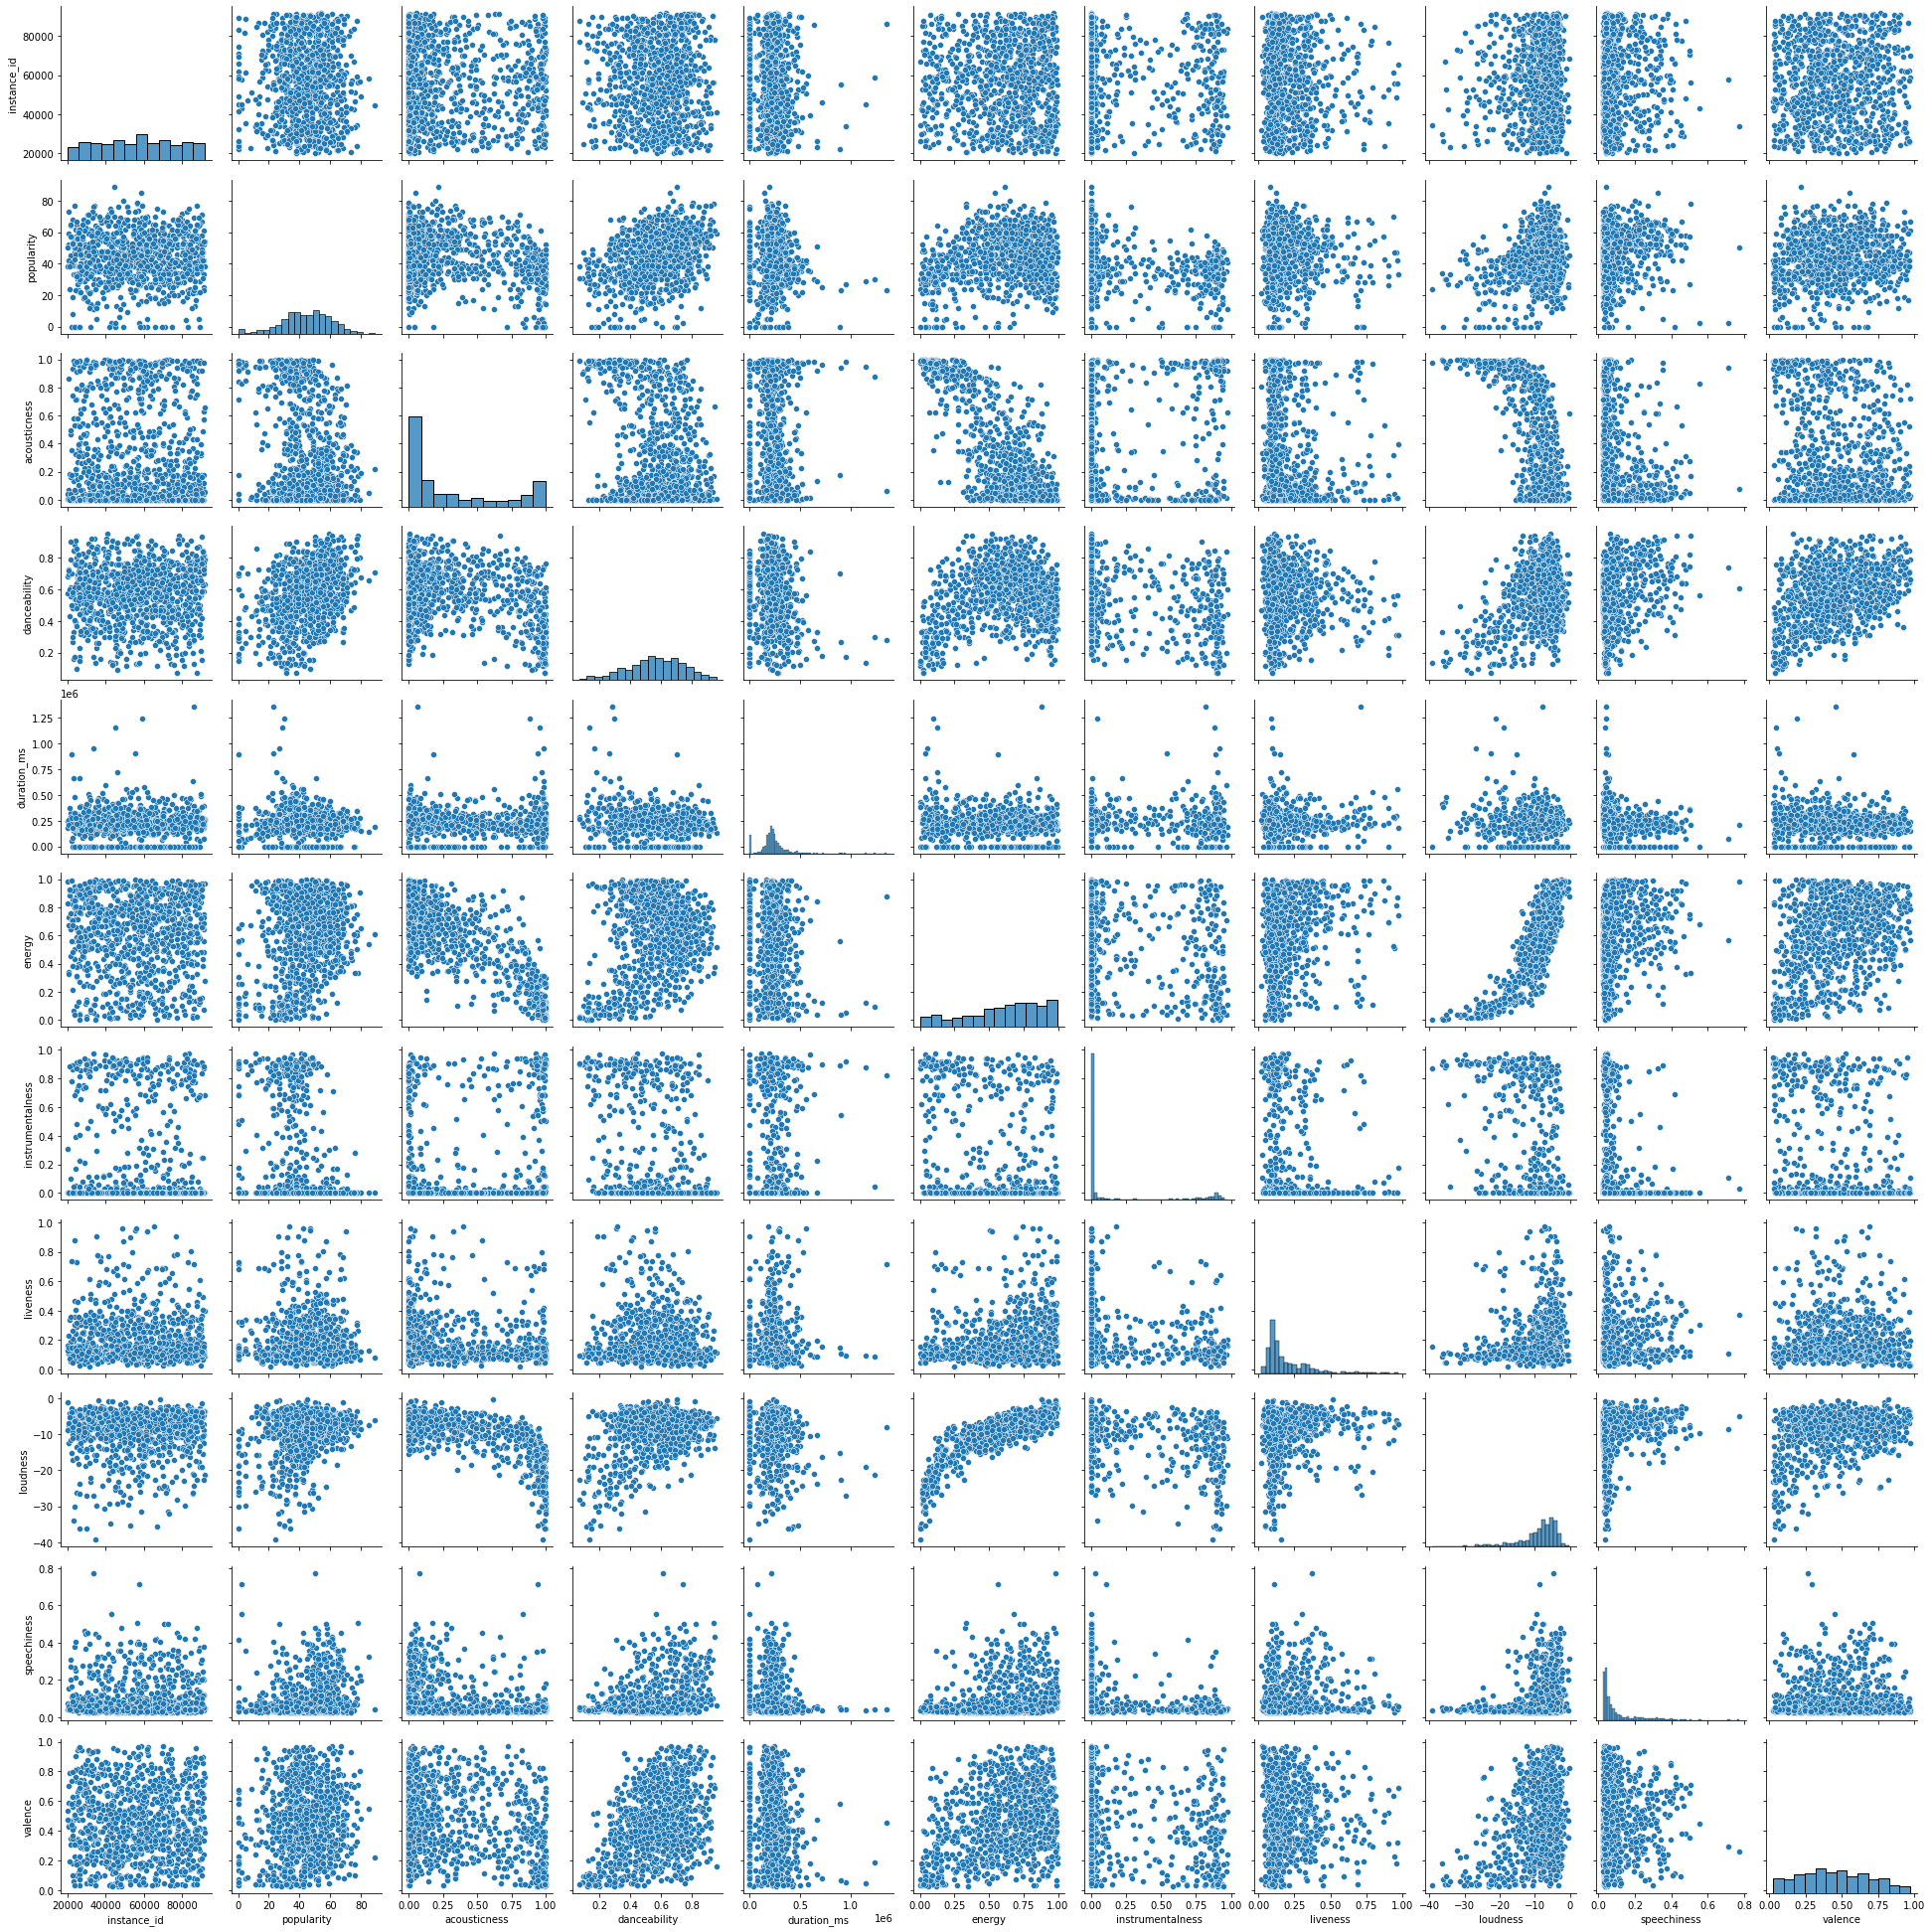

In [9]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind='hist')


<AxesSubplot:xlabel='key', ylabel='count'>

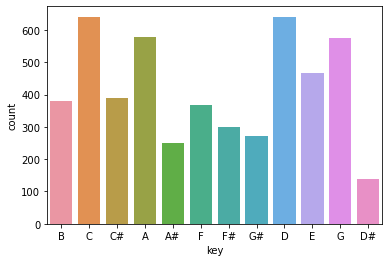

In [10]:
sns.countplot(x="key", data=data.loc[data["music_genre"] == "Rock"])

## 3. Пропущенные значения



In [11]:
data.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Есть 5 строчек с просто невалидными данными, уберем их


In [13]:
data = data.dropna()
data[data.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [14]:
data.head(6)["tempo"]

0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
5                     ?
Name: tempo, dtype: object

В темпе есть строчки со значением "?" вместо числа


In [15]:
data['tempo']= data['tempo'].replace('?', 0.0)

In [16]:
data.head(6)["tempo"]

0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
5                   0.0
Name: tempo, dtype: object

In [17]:
data['tempo'] = pd.to_numeric(data['tempo'])

In [18]:
data.head(6)["tempo"]

0    100.889
1    115.002
2    127.994
3    128.014
4    145.036
5      0.000
Name: tempo, dtype: float64

In [19]:
data['tempo'].mean()

108.00564571999973

In [20]:
data['tempo']= data['tempo'].replace(0,data['tempo'].mean())

In [21]:
data.head(6)["tempo"]

0    100.889000
1    115.002000
2    127.994000
3    128.014000
4    145.036000
5    108.005646
Name: tempo, dtype: float64

In [22]:
data['duration_ms']= data['duration_ms'].replace(-1.0,data['duration_ms'].mean())

In [23]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.431080e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,118.763008,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.060335e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.295002,0.247119
min,20002.000000,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.948750e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.212526e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,113.779000,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## 4. Категориальные признаки


Лад и тональность - категориальные признаки


In [24]:
data.at[data['mode'] == 'Minor', 'mode'] = 0
data.at[data['mode'] == 'Major', 'mode'] = 1
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,221252.60286,0.941,0.79200,A#,0.115,-5.201,0,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.00000,0.890,0.95000,D,0.124,-7.043,0,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.00000,0.755,0.01180,G#,0.534,-4.617,1,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.00000,0.700,0.00253,C#,0.157,-4.498,1,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.00000,0.587,0.90900,F#,0.157,-6.266,1,0.0413,145.036,4-Apr,0.323,Electronic


In [25]:
data['mode'].mean()

0.64198

In [26]:
data_nonbinary = pd.get_dummies(data['key']) 
data_nonbinary.columns

Index(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'], dtype='object')

In [27]:
data = pd.concat((data, data_nonbinary), axis = 1).drop('key', axis = 1)

In [28]:
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,221252.60286,0.941,0.79200,0.115,...,0,0,0,0,0,0,0,0,0,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.00000,0.890,0.95000,0.124,...,0,0,0,1,0,0,0,0,0,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.00000,0.755,0.01180,0.534,...,0,0,0,0,0,0,0,0,0,1
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.00000,0.700,0.00253,0.157,...,0,0,1,0,0,0,0,0,0,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.00000,0.587,0.90900,0.157,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,221252.60286,0.574,0.00000,0.119,...,0,0,1,0,0,0,0,0,0,0
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.00000,0.362,0.00000,0.109,...,1,0,0,0,0,0,0,0,0,0
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.00000,0.763,0.00000,0.143,...,0,0,0,1,0,0,0,0,0,0
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.00000,0.472,0.00000,0.106,...,0,0,0,0,0,0,0,0,1,0


In [29]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'obtained_date', 'valence', 'music_genre', 'A', 'A#', 'B', 'C',
       'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.music_genre)
data['music_genre'] = le.transform(data.music_genre)
data['music_genre']

0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 50000, dtype: int32

## 5. Нормализация



In [31]:
numCols   = [c for c in data.columns if (data[c].dtype.name == 'float64')]
numCols

['instance_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [32]:
data_norm = (data[numCols] - data[numCols].mean(axis = 0))/data[numCols].std(axis = 0)
data_norm.describe()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.627498e-17,-4.634590e-15,-6.668188e-15,2.168004e-14,-1.597147e-14,-1.297531e-14,3.188388e-14,3.519081e-15,6.878209e-15,-5.442836e-15,-9.731324e-14,7.339791e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731530e+00,-2.845219e+00,-8.975881e-01,-2.791443e+00,-2.146481e+00,-2.264002e+00,-5.580689e-01,-1.139754e+00,-6.151599e+00,-7.032084e-01,-2.881584e+00,-1.846337e+00
25%,-8.643993e-01,-6.575997e-01,-8.389955e-01,-6.507288e-01,-4.548846e-01,-6.303116e-01,-5.580689e-01,-6.000879e-01,-2.800976e-01,-5.670777e-01,-7.505464e-01,-8.063512e-01
50%,1.211258e-03,5.015954e-02,-4.757213e-01,5.463220e-02,-2.061181e-01,1.634613e-01,-5.575834e-01,-4.200549e-01,3.013572e-01,-4.408116e-01,-1.701317e-01,-3.344338e-02
75%,8.672922e-01,7.579188e-01,7.195678e-01,7.208064e-01,2.405297e-01,8.135992e-01,-8.174536e-02,3.099757e-01,6.426688e-01,4.871630e-02,7.067841e-01,7.758842e-01
max,1.730768e+00,3.524614e+00,2.020324e+00,2.394639e+00,4.326459e+01,1.509096e+00,2.502694e+00,4.987121e+00,2.089532e+00,8.369211e+00,3.465198e+00,2.167928e+00


In [33]:
data = pd.concat((data_norm, data.drop(['instance_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence'], axis=1)), axis=1)
data

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,-1.109487,-1.107992,-0.883877,0.524873,-0.206118,1.289863,1.875791,-0.488109,0.638126,-0.185320,...,0,0,0,0,0,0,0,0,0,0
1,-0.445659,-0.850625,-0.860382,0.356930,-0.234030,1.097090,2.361333,-0.432428,0.339245,-0.627251,...,0,0,0,1,0,0,0,0,0,0
2,-1.244443,-1.043650,-0.888623,0.345734,-0.259305,0.586807,-0.521807,2.104119,0.732885,-0.582861,...,0,0,0,0,0,0,0,0,0,1
3,0.303427,-0.657600,-0.823175,1.207841,-0.718952,0.378914,-0.550294,-0.228267,0.752194,1.434438,...,0,0,1,0,0,0,0,0,0,0
4,-1.494862,-0.786283,-0.883965,0.446499,-0.195589,-0.048211,2.235338,-0.228267,0.465320,-0.515782,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.144249,0.950944,-0.799738,1.985978,-0.206118,-0.097350,-0.558069,-0.463362,0.342652,2.016446,...,0,0,1,0,0,0,0,0,0,0
50001,-0.594994,1.787387,-0.437636,0.843965,0.082540,-0.898683,-0.558069,-0.525229,-0.110375,-0.380638,...,1,0,0,0,0,0,0,0,0,0
50002,-0.777862,0.436210,-0.880098,0.754395,-0.505736,0.617046,-0.558069,-0.314881,0.598859,0.517035,...,0,0,0,1,0,0,0,0,0,0
50003,0.099184,1.336995,-0.654136,1.252626,0.185460,-0.482897,-0.558069,-0.543789,0.668143,-0.488161,...,0,0,0,0,0,0,0,0,1,0


## 6. Разбить выборку



In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   popularity        50000 non-null  float64
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       50000 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   speechiness       50000 non-null  float64
 10  tempo             50000 non-null  float64
 11  valence           50000 non-null  float64
 12  artist_name       50000 non-null  object 
 13  track_name        50000 non-null  object 
 14  mode              50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  music_genre       50000 non-null  int32 

In [35]:
x = data.drop(['instance_id', 'music_genre', 'artist_name', 'track_name', 'obtained_date'], axis=1)
y = data['music_genre']

## 7. Ближайшие соседи-медведи



In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37500 12500


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.35152 0.54632


In [38]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.41386666666666666 0.50056


In [39]:
knn = KNeighborsClassifier(33)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.44277333333333335 0.48072


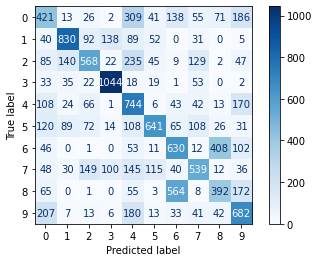

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [41]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


Очень часто классификатор путает рэп и хип-хоп, что вроде бы довольно логично, ведь (вроде) жанры похожие. Так же путает альтернативу, рок и кантри. Посмотрим, что будет, если удалить такие категории.


In [71]:
data_c = data[data['music_genre'].isin([1,3,5,6,7,9])]

In [72]:
data_c

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,-1.109487,-1.107992,-0.883877,0.524873,-0.206118,1.289863,1.875791,-0.488109,0.638126,-0.185320,...,0,0,0,0,0,0,0,0,0,0
1,-0.445659,-0.850625,-0.860382,0.356930,-0.234030,1.097090,2.361333,-0.432428,0.339245,-0.627251,...,0,0,0,1,0,0,0,0,0,0
2,-1.244443,-1.043650,-0.888623,0.345734,-0.259305,0.586807,-0.521807,2.104119,0.732885,-0.582861,...,0,0,0,0,0,0,0,0,0,1
3,0.303427,-0.657600,-0.823175,1.207841,-0.718952,0.378914,-0.550294,-0.228267,0.752194,1.434438,...,0,0,1,0,0,0,0,0,0,0
4,-1.494862,-0.786283,-0.883965,0.446499,-0.195589,-0.048211,2.235338,-0.228267,0.465320,-0.515782,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.144249,0.950944,-0.799738,1.985978,-0.206118,-0.097350,-0.558069,-0.463362,0.342652,2.016446,...,0,0,1,0,0,0,0,0,0,0
50001,-0.594994,1.787387,-0.437636,0.843965,0.082540,-0.898683,-0.558069,-0.525229,-0.110375,-0.380638,...,1,0,0,0,0,0,0,0,0,0
50002,-0.777862,0.436210,-0.880098,0.754395,-0.505736,0.617046,-0.558069,-0.314881,0.598859,0.517035,...,0,0,0,1,0,0,0,0,0,0
50003,0.099184,1.336995,-0.654136,1.252626,0.185460,-0.482897,-0.558069,-0.543789,0.668143,-0.488161,...,0,0,0,0,0,0,0,0,1,0


In [73]:
x = data_c.drop(['instance_id', 'music_genre', 'artist_name', 'track_name', 'obtained_date'], axis=1)
y = data_c['music_genre']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.21955555555555556 0.2532


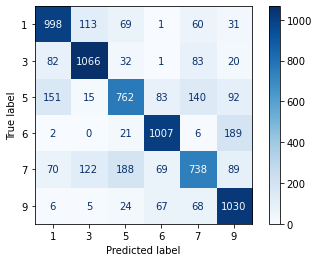

In [74]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

После удаления похожим музыкальных жанров стал классифицировать лучше